In [136]:
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('goodreadsbooks/books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [137]:
df['year'] = pd.to_numeric(pd.DataFrame(df.publication_date.str.split('/').tolist()).ix[:,2])

In [138]:
import matplotlib.pyplot as plt

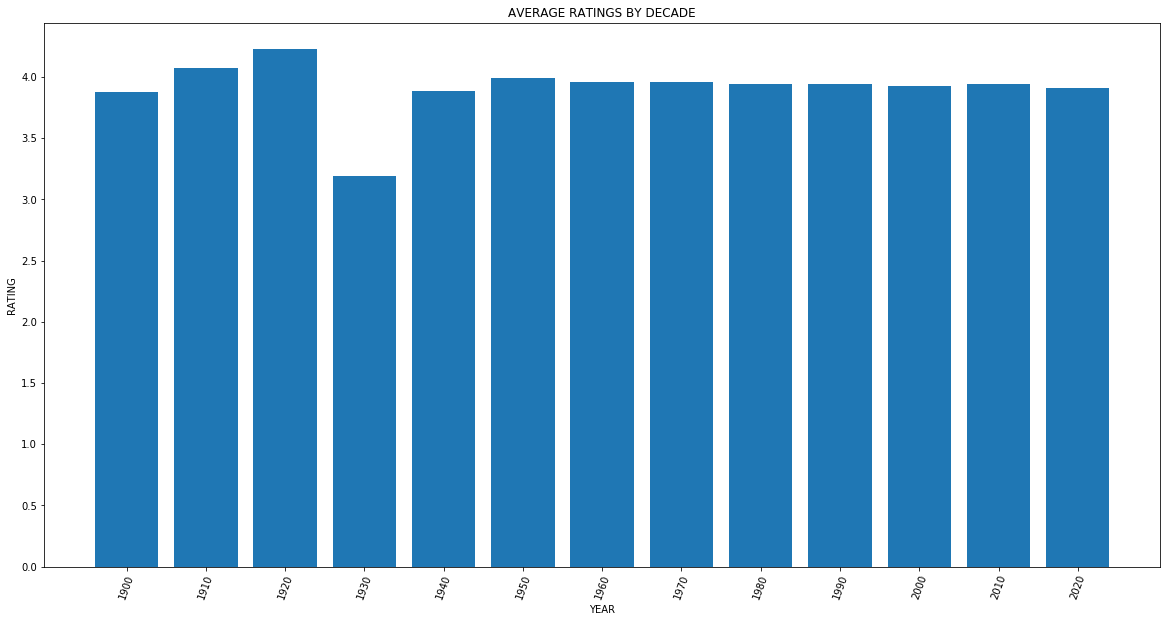

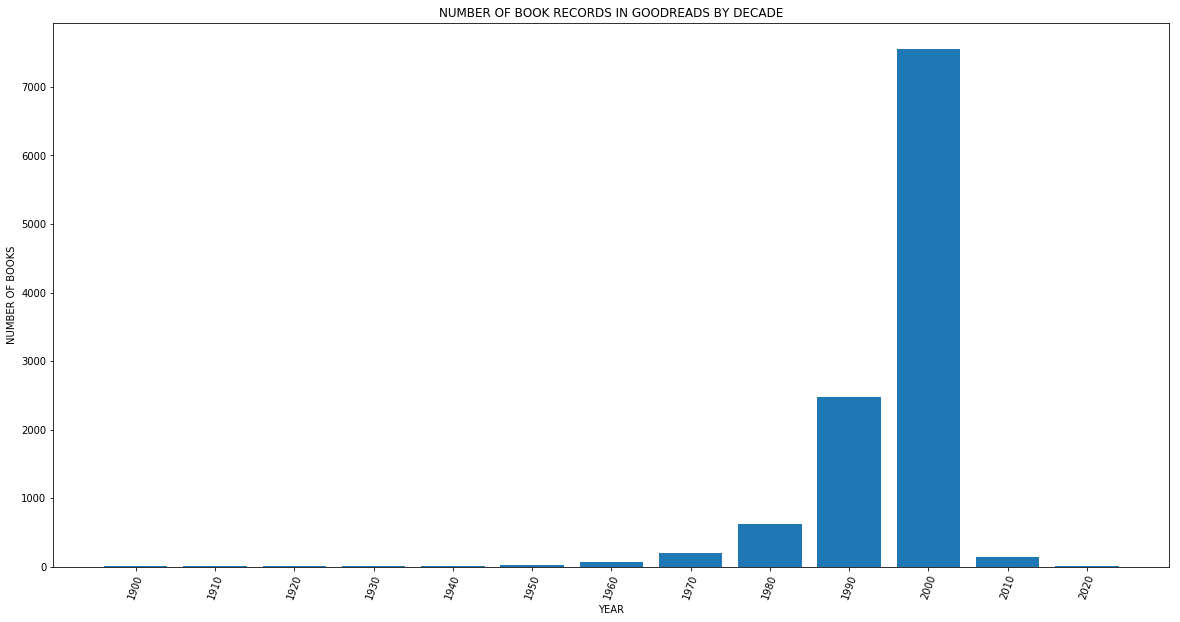

In [139]:
year_avg = {}

idx, val, c = 0, 0, 0
for i in range(len(df)):
    year = (df['year'][i]//10) * 10
    if year in year_avg:
        year_avg[year]['rate'] += df['average_rating'][i]
        year_avg[year]['count'] += 1
    else:
        year_avg[year] = {}
        year_avg[year]['rate'] = df['average_rating'][i]
        year_avg[year]['count'] = 1
decade = []
num_books = []
avg_rating = []
for item in sorted(year_avg):
    decade.append(item)
    avg_rating.append(year_avg[item]['rate']/year_avg[item]['count'])
    num_books.append(year_avg[item]['count'])
plt.title('AVERAGE RATINGS BY DECADE')
plt.xlabel('YEAR')
plt.ylabel('RATING')
plt.bar(range(len(avg_rating)), avg_rating, align='center')
plt.xticks(range(len(decade)), decade)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(20, 10)
plt.show()
plt.title('NUMBER OF BOOK RECORDS IN GOODREADS BY DECADE')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF BOOKS')
plt.bar(range(len(num_books)), num_books, align='center')
plt.xticks(range(len(decade)), decade)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Meanings from the Data

I had a suspicion that users have more positive outlook towards authors and works of the past, and wanted to verify this with Goodreads data. Goodreads has an api for querying through its collection of user reviews. I have adapted the dataset from kaggle available here - https://www.kaggle.com/jealousleopard/goodreadsbooks

As for my suspicion, it does appear that books from the 1920's and 1930's are more highly rated as compared to other decades. But on looking at the data itself, it seems that a majority of the reviews are for books from 2000s. There are very little books available for review from the past, as not many (little-known or flop) books would have survived the test of time to land in the hands of the average reader in the era of Goodreads. However, recent times have seen a great influx of reviews on Goodreads mainly because of the volume of books being published and the easy accessibility of these books to the average user of the platform. The dataset seems to be heavily skewed, but it also reflects one idea - that only the most popular books of the past are well-known today, and that's why it appears that the past fared better in terms of the quality of literature.

## Some more stats
Below are some more generic stats plots from a preliminary EDA.


In [140]:
df.head

<bound method NDFrame.head of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5           9  Unauthorized Harry Potter Book Seven News: "Ha...   
6          10       Harry Potter Collection (Harry Potter  #1-6)   
7          12  The Ultimate Hitchhiker's Guide: Five Complete...   
8          13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
9          14  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
10         16  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
11         18  The Ultimate Hitchhiker's Guide (Hitchhiker's ...   
12         21               A Short History of Nearly Everything   
13         22     

## Relation between number of ratings and rating

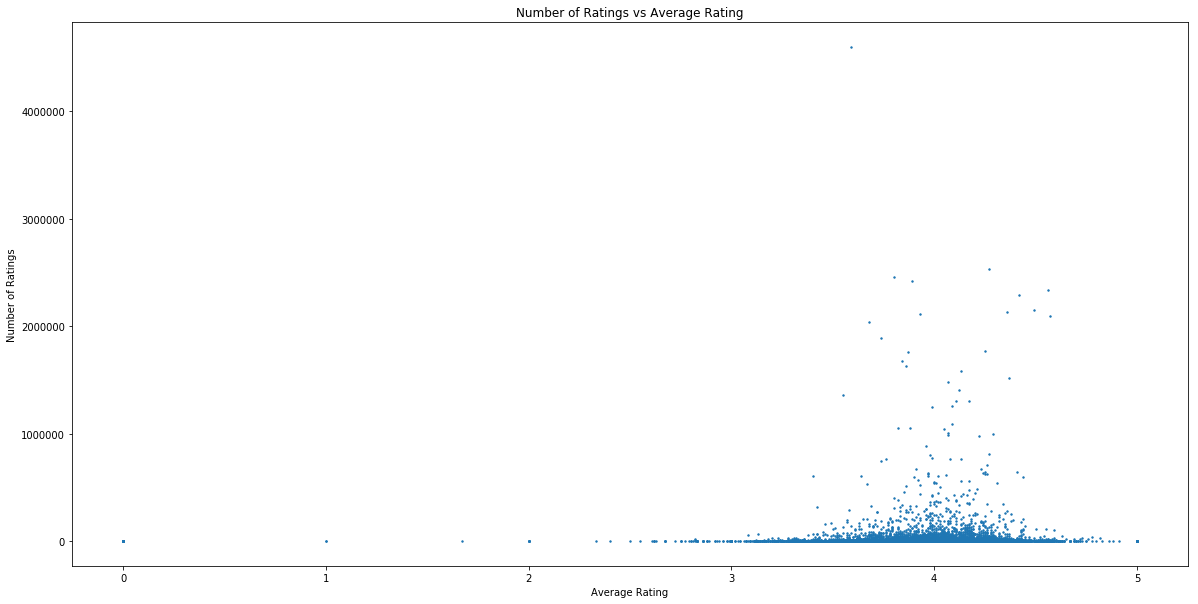

In [141]:
plt.title('Number of Ratings vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.scatter(df["average_rating"], df["ratings_count"], 2)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Relation between year and average rating

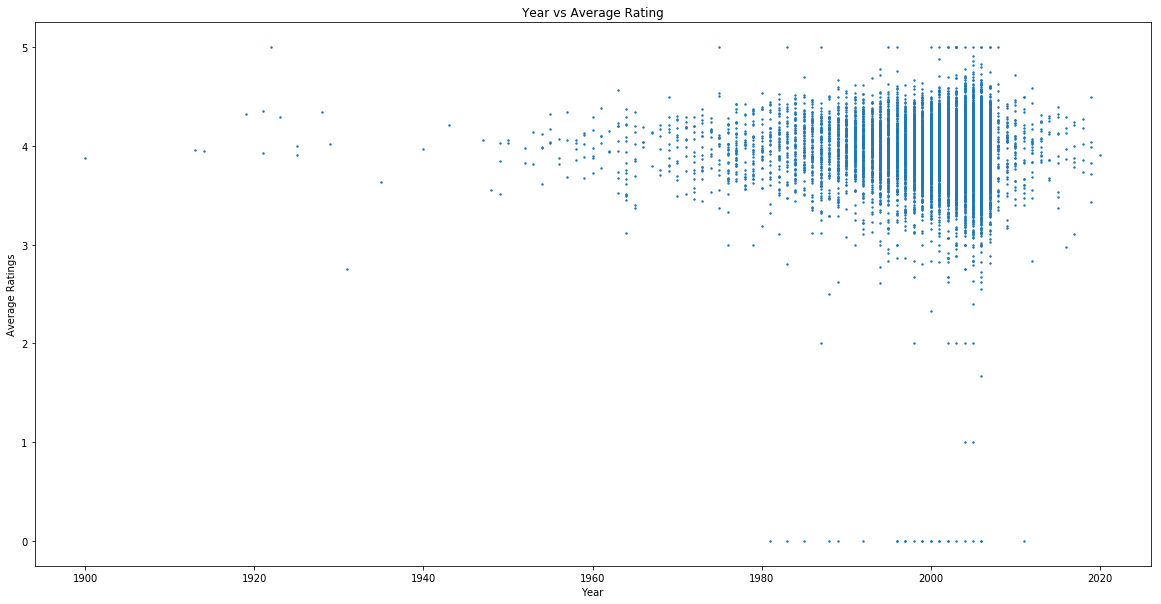

In [142]:
plt.title('Year vs Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.scatter(df["year"], df["average_rating"], 2)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Relation between number of pages and average rating

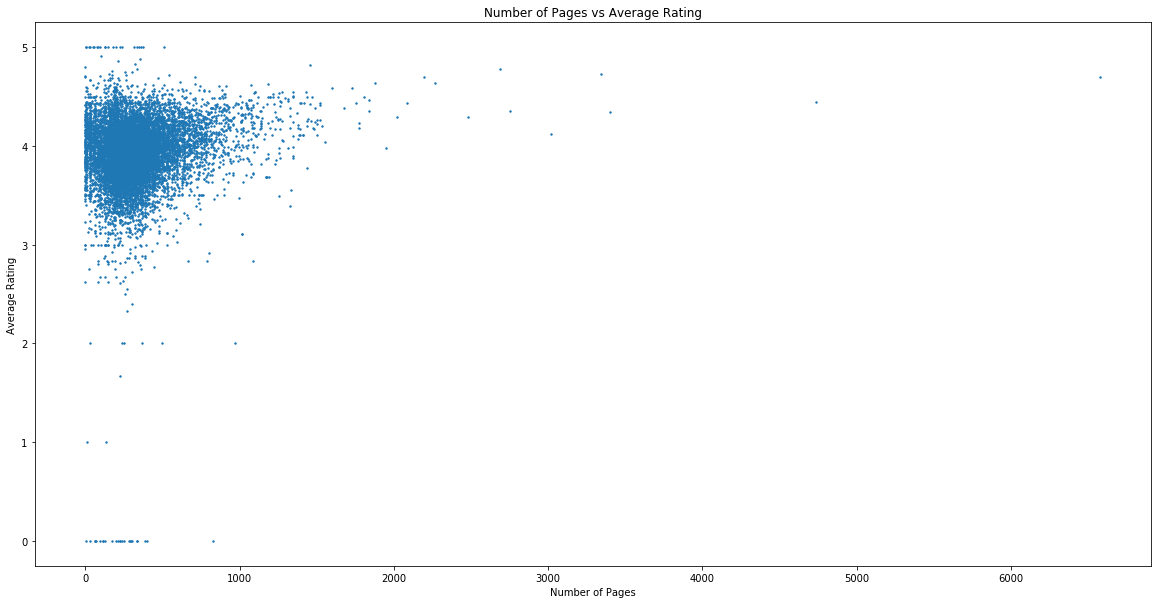

In [143]:
plt.title('Number of Pages vs Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Number of Pages')
plt.scatter(df["  num_pages"], df["average_rating"], 2)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Relation between number of pages and number of ratings

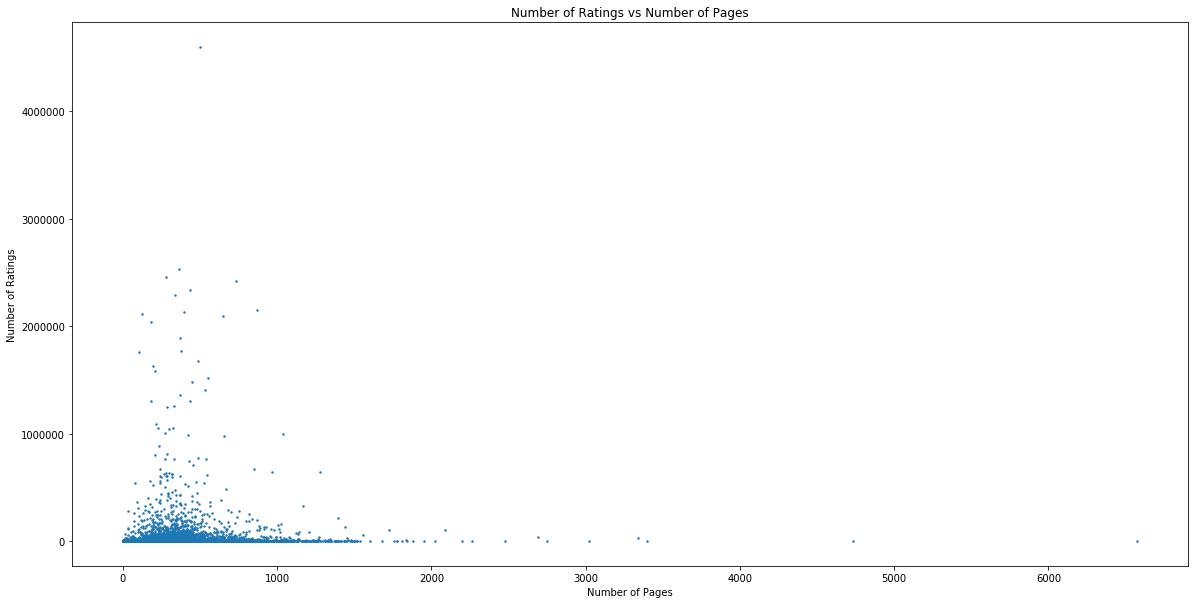

In [144]:
plt.title('Number of Ratings vs Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Ratings')
plt.scatter(df["  num_pages"], df["ratings_count"], 2)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Relation between number of pages and year

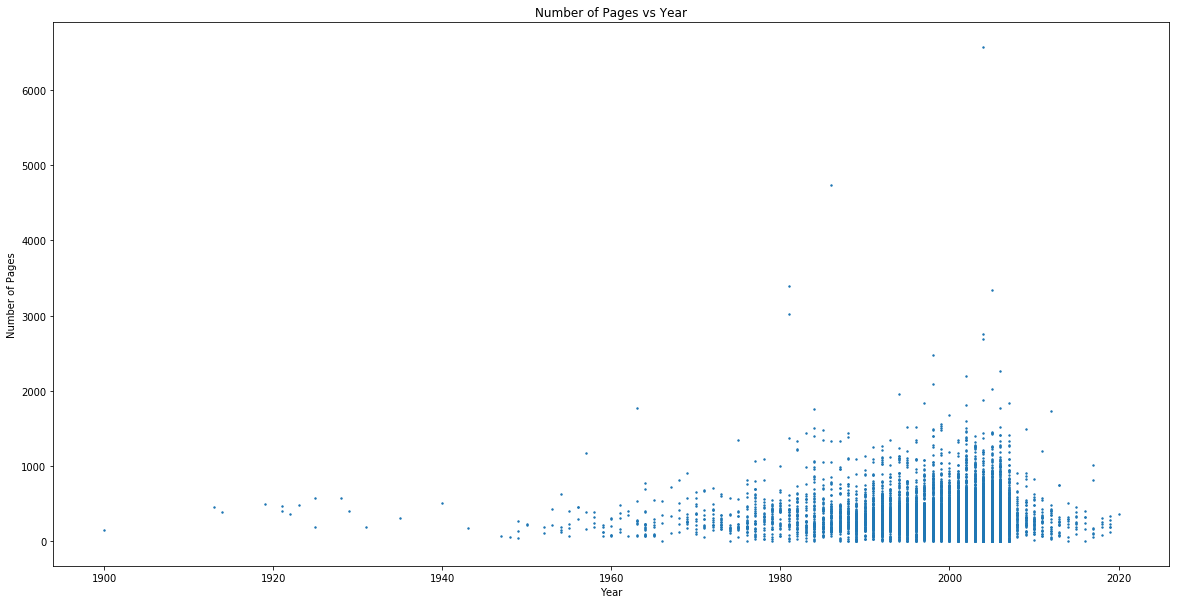

In [145]:
plt.title('Number of Pages vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Pages')
plt.scatter(df["year"], df["  num_pages"], 2)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Highest rated books

I've taken the average rating as a measure of highest rated books.

We need to ensure ratings_count is substantial enough (I've taken as > 1000) as there were many books with single 5 star reviews, incorrectly making them the top rated.

Seems like kids books are more highly (positively) rated, as their is not much to criticize about them. Adult and YA books tend to be more harshly judged. 


In [146]:
df[df['ratings_count'] > 1000].nlargest(20, 'average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,2005
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,1996
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,2005
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,0836217691,9780836217698,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing,1994
6593,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,0740721356,9780740721359,eng,96,3613,85,9/17/2001,Andrews McMeel Publishing,2001
5614,20749,Study Bible: NIV,Anonymous,4.70,0310929555,9780310929550,eng,2198,4166,186,10/1/2002,Zondervan Publishing House,2002
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company,2004
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,0836217357,9780836217353,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing,1993
1530,5309,The Life and Times of Scrooge McDuck,Don Rosa,4.67,0911903968,9780911903966,eng,266,2467,149,6/1/2005,Gemstone Publishing,2005


## Most popular books

I've taken the number of reviews as a measure of popularity. The higher the number of reviews a book has, the higher the number of people who've read it.

In [147]:
df[df['ratings_count'] > 1000].nlargest(20, 'ratings_count')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,2006
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,2002
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books,2001
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books,2006
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,1999
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,2003
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL,2003
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006


## Top Latest Books

In [148]:
df[df['ratings_count'] > 30000].sort_values('year', ascending=False)[:20]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
9664,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,0060773758,9780060773755,eng,360,35275,1370,3/31/2020,Avon,2020
10823,44184,Monster,Walter Dean Myers,3.72,0064407314,9780064407311,eng,281,56171,5341,3/5/2019,Amistad,2019
3981,14142,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,0061129739,9780061129735,eng,192,38148,1310,8/6/2019,Harper Perennial Modern Classics,2019
9636,38500,Women,Charles Bukowski,3.86,0061177598,9780061177590,eng,291,52415,2081,7/29/2014,Ecco,2014
9637,38501,Ham on Rye,Charles Bukowski,4.14,006117758X,9780061177583,eng,288,65829,2318,7/29/2014,Ecco,2014
2427,8852,Macbeth,William Shakespeare,3.90,0743477103,9780743477109,eng,249,592315,7791,7/1/2013,Simon Schuster,2013
1320,4631,A Moveable Feast,Ernest Hemingway,4.04,0099285045,9780099285045,eng,192,82993,4808,9/6/2012,Vintage,2012
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,2012
368,1274,Men Are from Mars Women Are from Venus,John Gray,3.55,0060574216,9780060574215,eng,368,132062,3303,4/3/2012,Harper Paperbacks,2012
10465,42607,As You Like It,William Shakespeare,3.83,074348486X,9780743484862,eng,263,62368,1291,8/23/2011,Simon Schuster,2011


## About the authors

There are 6639 distinct authors.

In [149]:
df['authors'].unique().tolist()

['J.K. Rowling/Mary GrandPré',
 'J.K. Rowling',
 'W. Frederick Zimmerman',
 'Douglas Adams',
 'Douglas Adams/Stephen Fry',
 'Bill Bryson',
 'J.R.R. Tolkien',
 'J.R.R. Tolkien/Alan  Lee',
 'Chris   Smith/Christopher  Lee/Richard Taylor',
 'Jude Fisher',
 'Dave Thomas/David Heinemeier Hansson/Leon Breedt/Mike Clark/Thomas  Fuchs/Andreas  Schwarz',
 'Gary Paulsen',
 'Donna Ickes/Edward Sciranko/Keith Vasconcelles',
 'Molly Hatchet',
 'Dale Peck',
 'Angela Knight/Sahara Kelly/Judy Mays/Marteeka Karland/Kate Douglas/Shelby Morgen/Lacey Savage/Kate Hill/Willa Okati',
 'Delia Sherman',
 'Patricia A. McKillip',
 'Zilpha Keatley Snyder',
 'Kate Horsley',
 'Philippa Carr',
 'Edward P. Jones',
 'Edward P. Jones/Kevin R. Free',
 'Satyajit Das',
 'Mark Smylie',
 'John McPhee/William Howarth',
 'John McPhee',
 'Wendy Wasserstein',
 'Heidi Hayes Jacobs',
 'Heidi Boyd',
 'Heidi Baker/Rolland Baker',
 'Johanna Spyri/Beverly Cleary/Angelo  Rinaldi',
 'Rolland Baker/Heidi Baker',
 'Heidi Murkoff/Sharon M

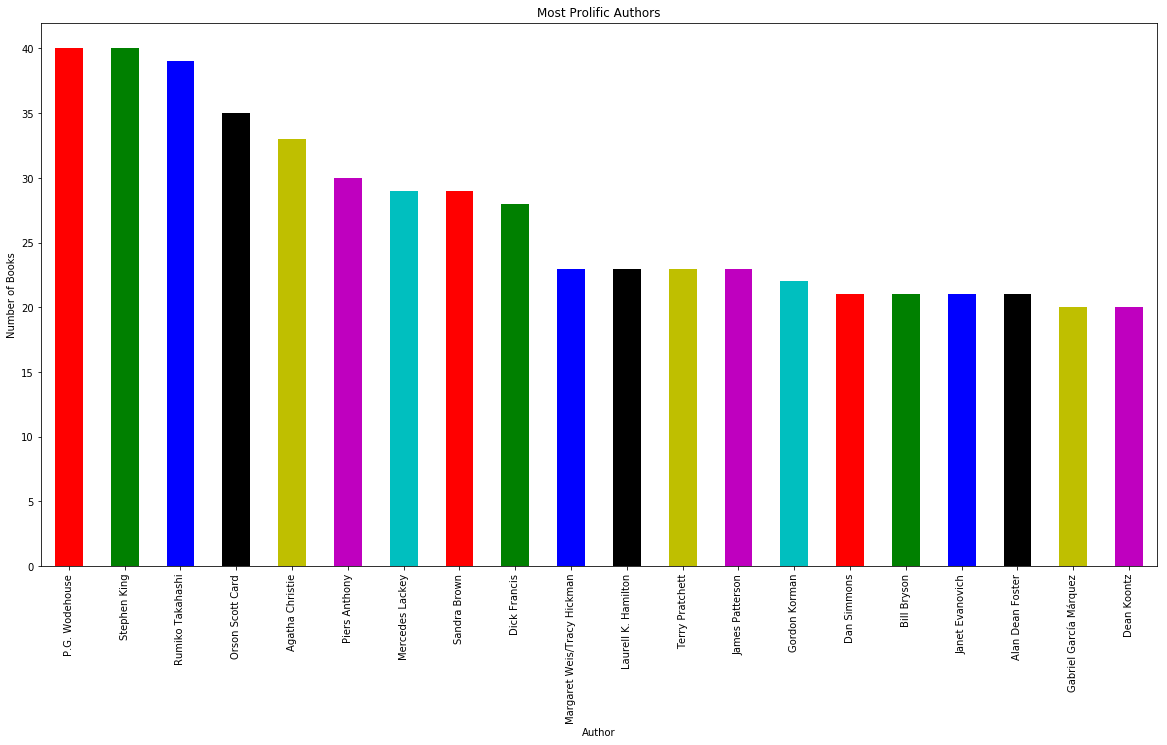

In [150]:
plt.title('Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
df['authors'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 10), color='rgbkymc')
plt.show()

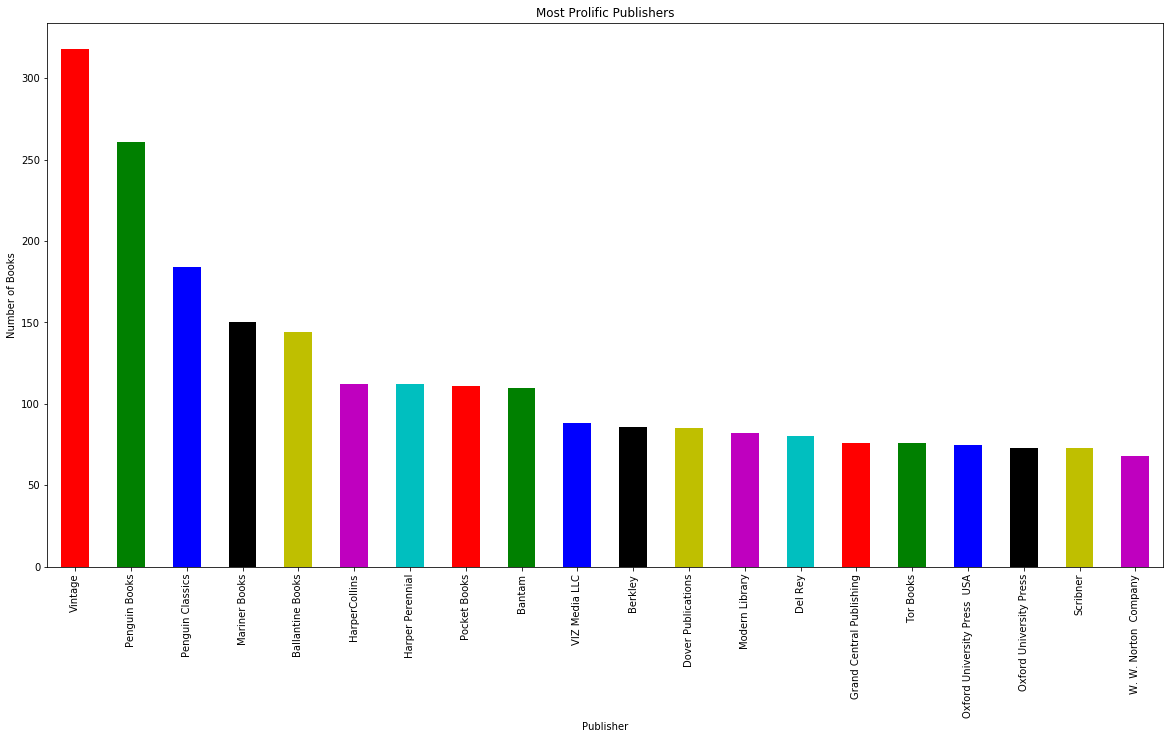

In [151]:
plt.title('Most Prolific Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
df['publisher'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 10), color='rgbkymc')
plt.show()

## A short description of the dataset
------------------------------------------------------

 - The top author is P.G. Wodehouse with 40 books. 
 - The top title is The Brothers Karamazov.
 - The top language is English, followed by Spanish and French.
 - The top publisher is Vintage.

In [152]:
categoricalVars = ['title', 'authors', 'language_code', 'publisher']
df[categoricalVars].describe()

,title,authors,language_code,publisher
count,11123,11123,11123,11123
unique,10348,6639,27,2290
top,The Brothers Karamazov,P.G. Wodehouse,eng,Vintage
freq,9,40,8908,318


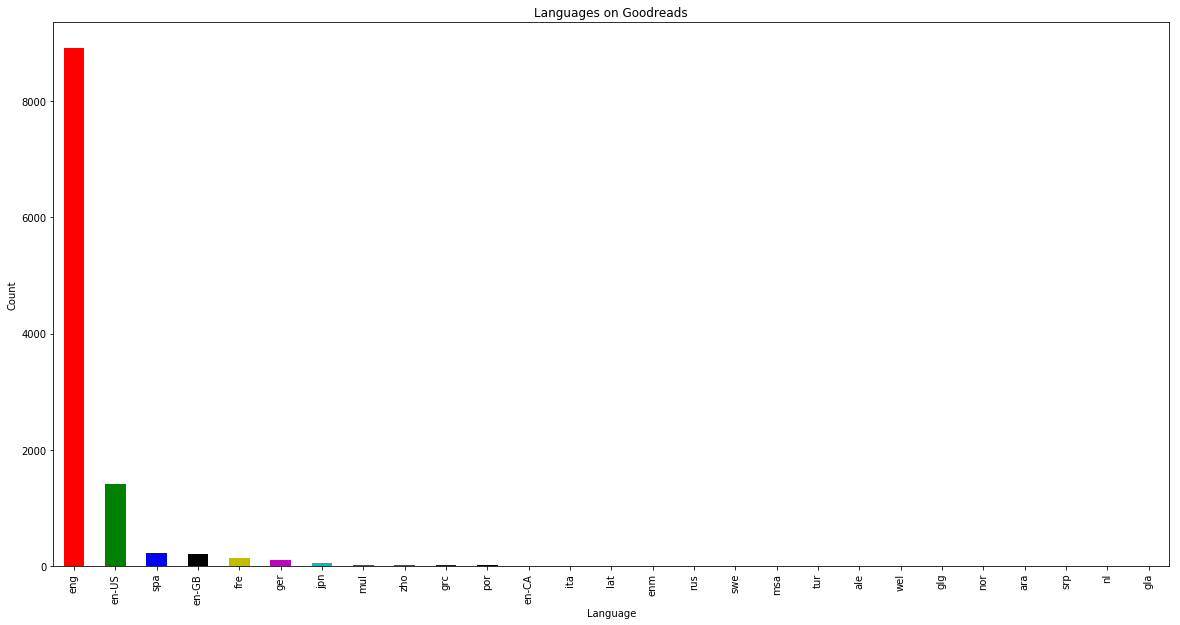

In [153]:
plt.title('Languages on Goodreads')
plt.xlabel('Language')
plt.ylabel('Count')
df['language_code'].value_counts().plot(kind = 'bar', figsize=(20, 10), color='rgbkymc')
plt.show()